In [1]:
# 🏋️ Exercice pratique – Première exploration de données (Titanic)

# 0) Imports de base
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 1) Charger le dataset Titanic (avec repli hors ligne)
try:
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    data = pd.read_csv(url)
    print("✓ Dataset Titanic chargé depuis internet")
except Exception:
    np.random.seed(42)
    n = 500
    data = pd.DataFrame({
        'PassengerId': np.arange(1, n+1),
        'Survived': np.random.choice([0,1], n),
        'Pclass': np.random.choice([1,2,3], n, p=[0.2,0.3,0.5]),
        'Name': [f'Passenger_{i}' for i in range(1, n+1)],
        'Sex': np.random.choice(['male','female'], n),
        'Age': np.clip(np.random.normal(30, 15, n), 0, 80),
        'SibSp': np.random.poisson(1, n),
        'Parch': np.random.poisson(0.5, n),
        'Ticket': [f'TCKT_{i}' for i in range(1, n+1)],
        'Fare': np.round(np.random.exponential(30, n), 2),
        'Cabin': np.where(np.random.rand(n)<0.2,
                          'C'+(np.random.randint(1,200,size=n)).astype(str), np.nan),
        'Embarked': np.random.choice(['C','Q','S'], n, p=[0.2,0.1,0.7])
    })
    print("✓ Dataset d'exemple créé (pas de connexion internet)")

data.head()


✓ Dataset Titanic chargé depuis internet


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



INSPECTION INITIALE DU DATASET
📊 Dimensions: 891 lignes × 12 colonnes
💾 Mémoire utilisée: 0.3 MB

📋 Types de colonnes:
  • int64: 5 colonnes
  • object: 5 colonnes
  • float64: 2 colonnes

📝 Liste des colonnes:
   1. PassengerId     | int64      |   0 nulls ( 0.0%)
   2. Survived        | int64      |   0 nulls ( 0.0%)
   3. Pclass          | int64      |   0 nulls ( 0.0%)
   4. Name            | object     |   0 nulls ( 0.0%)
   5. Sex             | object     |   0 nulls ( 0.0%)
   6. Age             | float64    | 177 nulls (19.9%)
   7. SibSp           | int64      |   0 nulls ( 0.0%)
   8. Parch           | int64      |   0 nulls ( 0.0%)
   9. Ticket          | object     |   0 nulls ( 0.0%)
  10. Fare            | float64    |   0 nulls ( 0.0%)
  11. Cabin           | object     | 687 nulls (77.1%)
  12. Embarked        | object     |   2 nulls ( 0.2%)

👀 Premières lignes du dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📈 Statistiques des variables numériques:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33



🏷️  Variables catégorielles (5):
  • Name: 891 valeurs uniques, plus fréquente: 'Abbing, Mr. Anthony'
  • Sex: 2 valeurs uniques, plus fréquente: 'male'
  • Ticket: 681 valeurs uniques, plus fréquente: '1601'
  • Cabin: 147 valeurs uniques, plus fréquente: 'B96 B98'
  • Embarked: 3 valeurs uniques, plus fréquente: 'S'


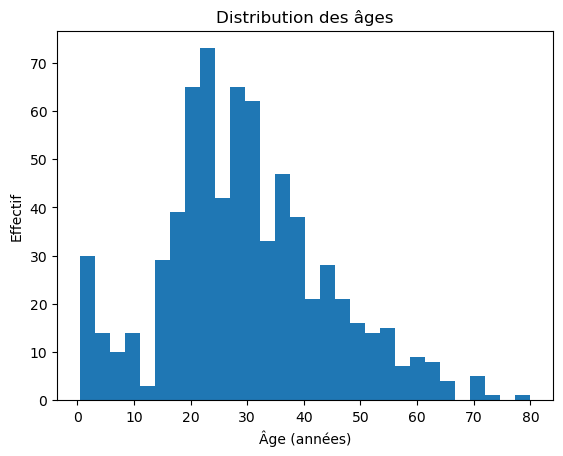

In [5]:
# 2) Rapport d’exploration rapide
print("\n" + "="*60)
print("INSPECTION INITIALE DU DATASET")
print("="*60)
print(f"📊 Dimensions: {data.shape[0]:,} lignes × {data.shape[1]} colonnes")
print(f"💾 Mémoire utilisée: {data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n📋 Types de colonnes:")
for dtype, count in data.dtypes.value_counts().items():
    print(f"  • {dtype}: {count} colonnes")

print("\n📝 Liste des colonnes:")
for i, col in enumerate(data.columns, 1):
    dtype_str = str(data[col].dtype)
    null_count = data[col].isnull().sum()
    null_pct = (null_count / len(data)) * 100
    print(f"  {i:2d}. {col:<15} | {dtype_str:<10} | {null_count:3d} nulls ({null_pct:4.1f}%)")

print("\n👀 Premières lignes du dataset:")
display(data.head())

print("\n📈 Statistiques des variables numériques:")
num_cols = data.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    display(data[num_cols].describe().round(2))

cat_cols = data.select_dtypes(include=['object','category']).columns
if len(cat_cols) > 0:
    print(f"\n🏷️  Variables catégorielles ({len(cat_cols)}):")
    for col in cat_cols:
        unique_count = data[col].nunique()
        mode = data[col].mode().iloc[0] if len(data[col].mode())>0 else "N/A"
        print(f"  • {col}: {unique_count} valeurs uniques, plus fréquente: '{mode}'")
# Histogramme – Distribution de l'âge
plt.figure()
data['Age'].dropna().plot(kind='hist', bins=30)
plt.title('Distribution des âges')
plt.xlabel('Âge (années)')
plt.ylabel('Effectif')
plt.show()


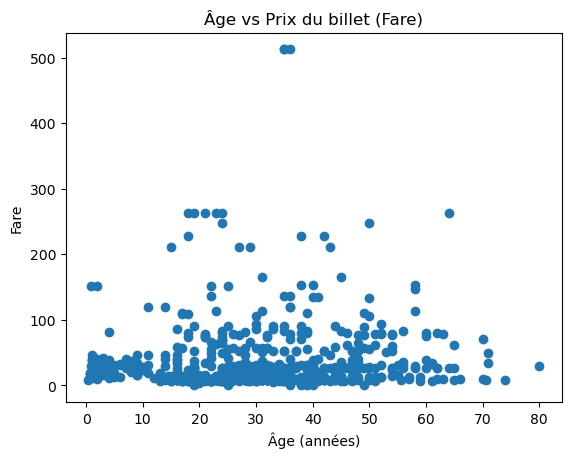

In [7]:
# Scatter – Âge vs Prix du billet
plt.figure()
plt.scatter(data['Age'], data['Fare'])
plt.title('Âge vs Prix du billet (Fare)')
plt.xlabel('Âge (années)')
plt.ylabel('Fare')
plt.show()


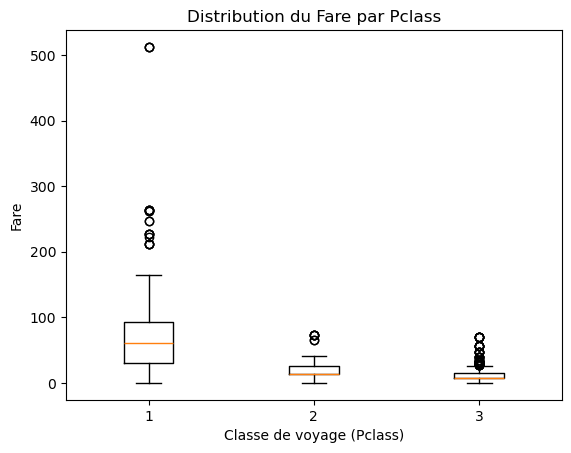

In [9]:
# Boxplot – Prix du billet par classe
plt.figure()
groups = [data.loc[data['Pclass']==c,'Fare'].dropna() for c in sorted(data['Pclass'].dropna().unique())]
plt.boxplot(groups, labels=sorted(data['Pclass'].dropna().unique()))
plt.title('Distribution du Fare par Pclass')
plt.xlabel('Classe de voyage (Pclass)')
plt.ylabel('Fare')
plt.show()


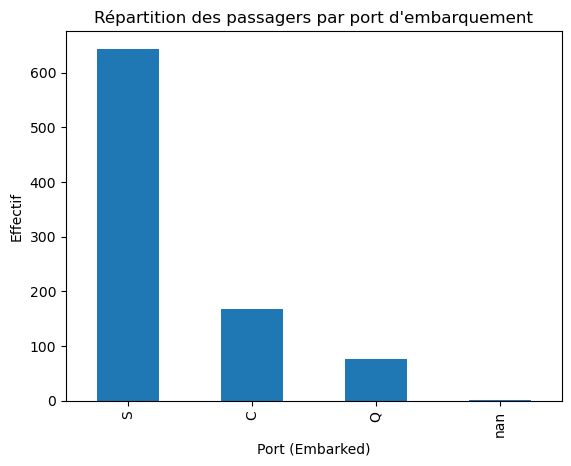

In [11]:
# Bar chart – Répartition des passagers par port d'embarquement
plt.figure()
data['Embarked'].value_counts(dropna=False).plot(kind='bar')
plt.title("Répartition des passagers par port d'embarquement")
plt.xlabel('Port (Embarked)')
plt.ylabel('Effectif')
plt.show()
